<a href="https://colab.research.google.com/github/RahulPrakash50/sample-flask/blob/main/Course_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project
Instructions:
- Please read the project description before your start.
- To download a copy of your ipython notebook: click ```File -> Download .ipyhon```
- Write your code in the code cells below each Step description. Write your answer to questions in a text cell. You may add extra cells if needed.

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

## Question 1: model and forecat electricity consumption data
Step 1: import data from Github
- Check to see that DataFrame elec has two columns ```date``` and ```elec```
- The variable ```elec``` is electricity retail sales to the residential sector in the US in million kilowatt hours.
- The sample is monthly and covers the period from 1973M1 to 2011M12 but use the sample up to **2010M12** (do not include observations from 2011)

In [3]:
elec = pd.read_csv('https://raw.githubusercontent.com/shihanxie/Econ475/main/data/elec.csv')

print(elec.head())
print(elec.columns)

elec['date'] = pd.date_range(start='1973-01-01', periods=elec.shape[0], freq='M')
elec.set_index('date', inplace=True)

elec = elec[:'2011-01-01']

print(elec.tail())


      date       elec
0  1973M01  52840.231
1  1973M02  49601.308
2  1973M03  46314.971
3  1973M04  41820.951
4  1973M05  39824.999
Index(['date', 'elec'], dtype='object')
                  elec
date                  
2010-08-31  154053.276
2010-09-30  124582.492
2010-10-31   96688.059
2010-11-30   93166.141
2010-12-31  130014.852


<ipython-input-3-aa12a178dad3>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  elec['date'] = pd.date_range(start='1973-01-01', periods=elec.shape[0], freq='M')


Step 2: determine whether it is better to take the log of electricity consumption or not. Plot the level or the log of electricity consumption depending on your choice. Properly label the x- and y- axis in your plot

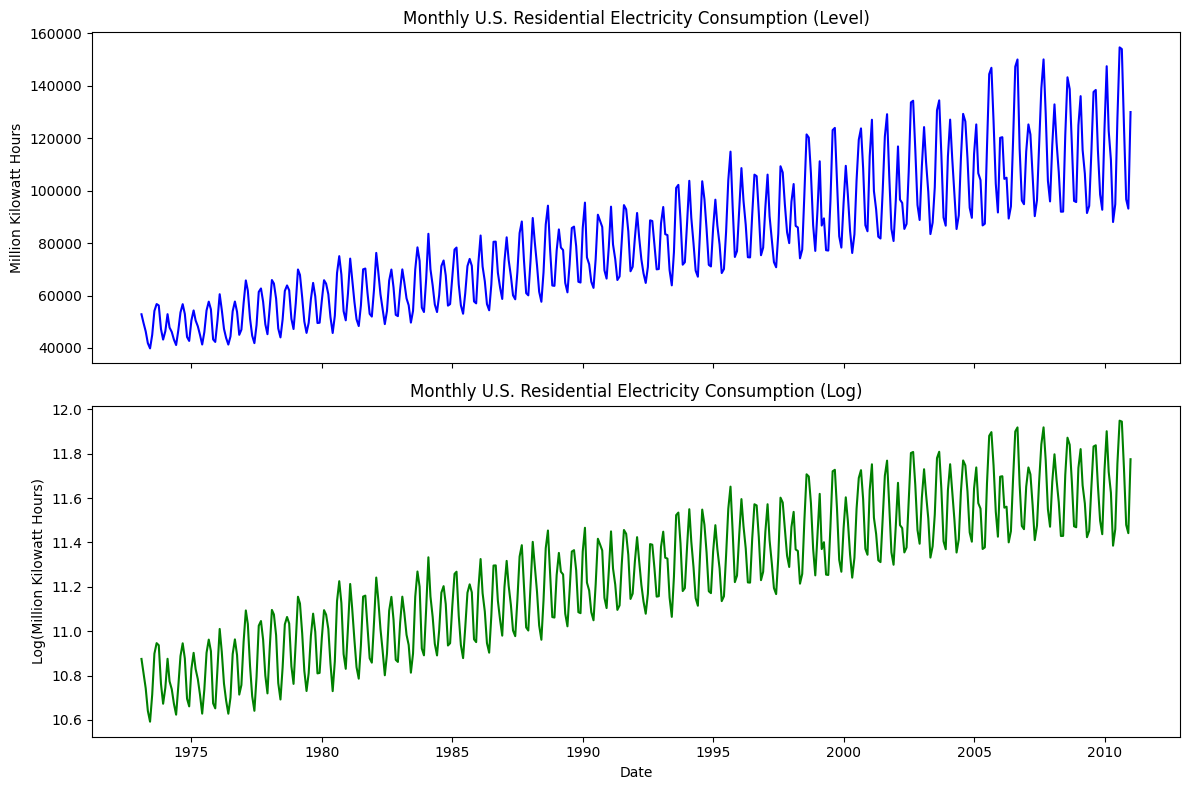

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

axs[0].plot(elec.index, elec['elec'], color='blue')
axs[0].set_title('Monthly U.S. Residential Electricity Consumption (Level)')
axs[0].set_ylabel('Million Kilowatt Hours')

axs[1].plot(elec.index, np.log(elec['elec']), color='green')
axs[1].set_title('Monthly U.S. Residential Electricity Consumption (Log)')
axs[1].set_ylabel('Log(Million Kilowatt Hours)')
axs[1].set_xlabel('Date')

plt.tight_layout()
plt.show()


After looking at both plots, the Log model seems to be bettter to use.

Step 3: Estimate a model with a linear trend and a model with a quadratic trend. Which one would you choose?

Linear Model Summary:
                            OLS Regression Results                            
Dep. Variable:               log_elec   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     1665.
Date:                Mon, 05 May 2025   Prob (F-statistic):          5.69e-154
Time:                        22:20:57   Log-Likelihood:                 232.59
No. Observations:                 456   AIC:                            -461.2
Df Residuals:                     454   BIC:                            -452.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7777      0.0

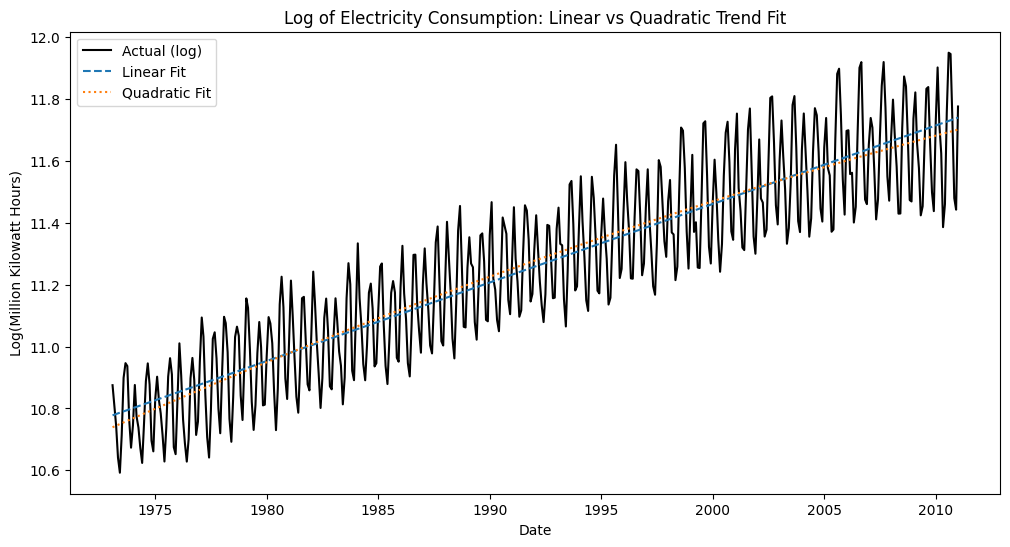

In [5]:
elec['trend'] = np.arange(len(elec))
elec['trend_sq'] = elec['trend']**2
elec['log_elec'] = np.log(elec['elec'])

X_lin = sm.add_constant(elec['trend'])
model_lin = sm.OLS(elec['log_elec'], X_lin).fit()

X_quad = sm.add_constant(elec[['trend', 'trend_sq']])
model_quad = sm.OLS(elec['log_elec'], X_quad).fit()

print("Linear Model Summary:")
print(model_lin.summary())
print("\nQuadratic Model Summary:")
print(model_quad.summary())

plt.figure(figsize=(12,6))
plt.plot(elec.index, elec['log_elec'], label='Actual (log)', color='black')
plt.plot(elec.index, model_lin.fittedvalues, label='Linear Fit', linestyle='--')
plt.plot(elec.index, model_quad.fittedvalues, label='Quadratic Fit', linestyle=':')
plt.title('Log of Electricity Consumption: Linear vs Quadratic Trend Fit')
plt.xlabel('Date')
plt.ylabel('Log(Million Kilowatt Hours)')
plt.legend()
plt.show()


Since the Quadratic model has a better R^2 and AIC/BIC values, it will be better suited for modeling.

Step 4: Depending on your choice of the model from Step 3, provide the plot and correlogram (up to 12 lags) of the residuals of the model you chose in Step 3.  Is there any seasonal pattern?

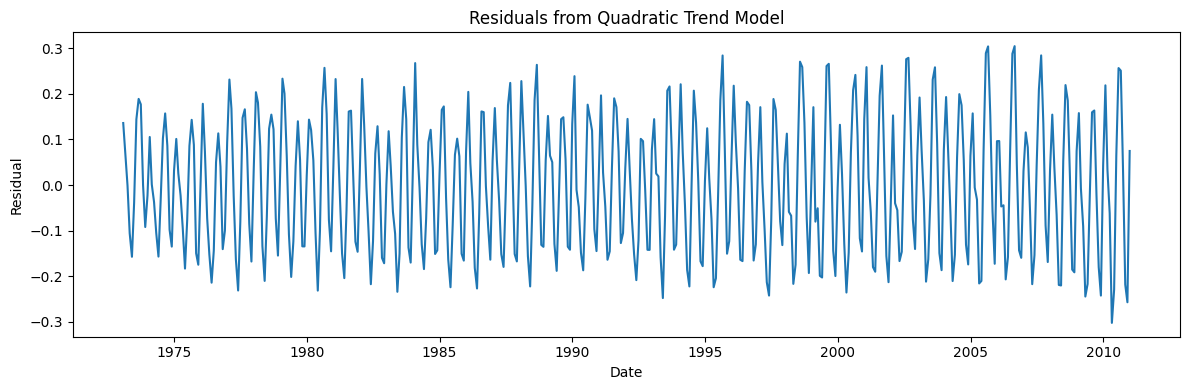

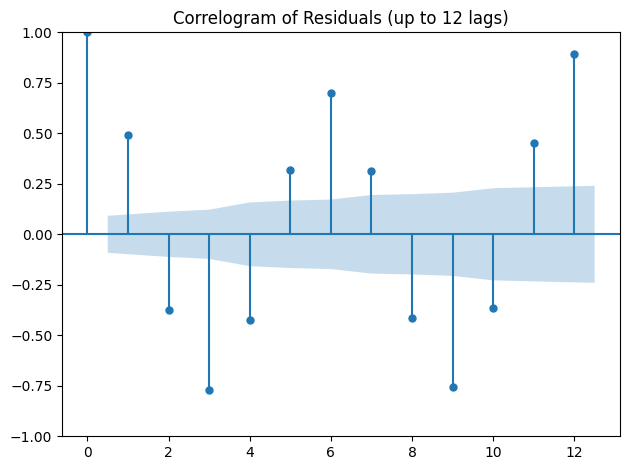

In [6]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

residuals = model_quad.resid

plt.figure(figsize=(12, 4))
plt.plot(elec.index, residuals)
plt.title('Residuals from Quadratic Trend Model')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.tight_layout()
plt.show()

plot_acf(residuals, lags=12)
plt.title('Correlogram of Residuals (up to 12 lags)')
plt.tight_layout()
plt.show()


A seasonal trend is clearly evident.

Step 5: Estimate a model with a trend and a full set of dummy variables (for 12 months) and report the result.

In [9]:
month_dummies = pd.get_dummies(elec['month'], prefix='month', drop_first=True)

X = pd.concat([elec['trend'], month_dummies], axis=1)

X = sm.add_constant(X)

X = X.astype(float)

y = elec['log_elec']
model_seasonal = sm.OLS(y, X).fit()

print(model_seasonal.summary())


                            OLS Regression Results                            
Dep. Variable:               log_elec   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1245.
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        22:28:14   Log-Likelihood:                 690.13
No. Observations:                 456   AIC:                            -1354.
Df Residuals:                     443   BIC:                            -1301.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9524      0.010   1123.112      0.0

Step 6: Provide  the  plot  and  correlogram  (up  to  12  lags)  of  the  residuals  of  the  model  you estimated in Step 5. Is there any cycles or serial correlation in the residuals?

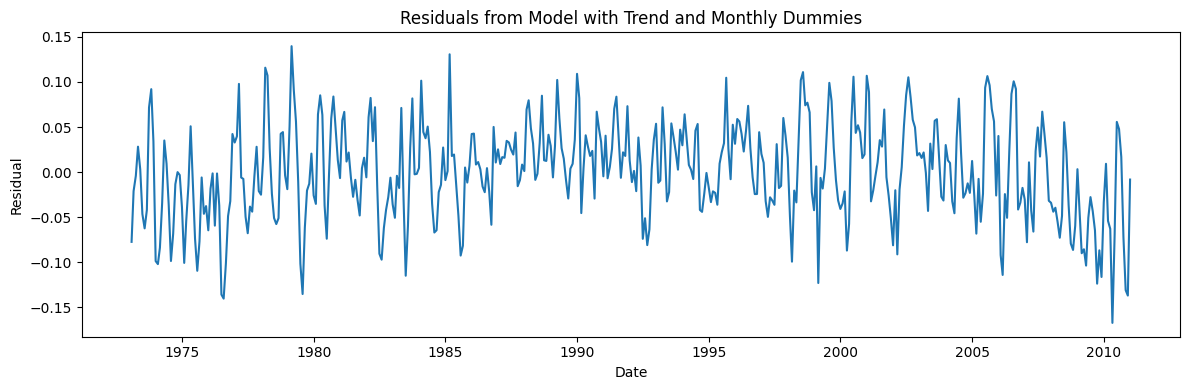

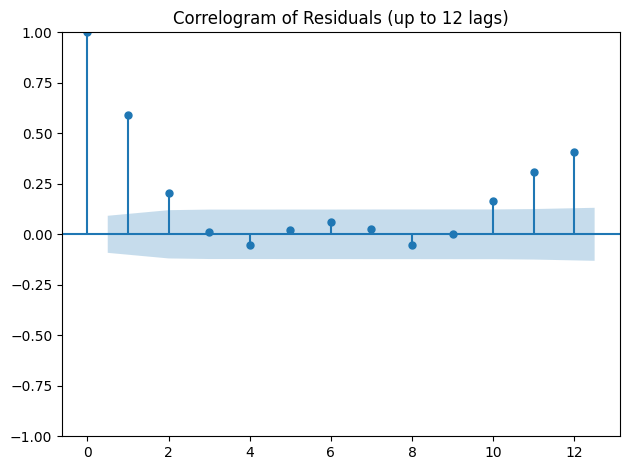

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

residuals_seasonal = model_seasonal.resid

plt.figure(figsize=(12, 4))
plt.plot(elec.index, residuals_seasonal)
plt.title('Residuals from Model with Trend and Monthly Dummies')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.tight_layout()
plt.show()

plot_acf(residuals_seasonal, lags=12)
plt.title('Correlogram of Residuals (up to 12 lags)')
plt.tight_layout()
plt.show()


There are no longer any clear signs of remaining cycles or serial correlation

Step 7: Estimate an ARMA(p,q) model with $p= 0,1,2,3$ and $q= 0,1,2,3$ except $p=q=0$ and report SICs. Which lag orders would you choose?

In [12]:
resid = model_seasonal.resid

results = []

for p in range(4):
    for q in range(4):
        if p == 0 and q == 0:
            continue
        try:
            model = ARIMA(resid, order=(p, 0, q)).fit()
            sic = model.bic
            results.append({'p': p, 'q': q, 'SIC': sic})
        except:
            results.append({'p': p, 'q': q, 'SIC': float('inf')})


sic_df = pd.DataFrame(results)
sic_df = sic_df.sort_values(by='SIC')
print(sic_df)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_date

    p  q          SIC
7   2  0 -1574.696819
4   1  1 -1572.873859
2   0  3 -1572.200432
8   2  1 -1568.620396
11  3  0 -1568.613340
1   0  2 -1568.443950
5   1  2 -1567.007602
6   1  3 -1566.864029
10  2  3 -1566.405791
12  3  1 -1562.547401
9   2  2 -1562.539201
14  3  3 -1559.628317
13  3  2 -1559.043387
3   1  0 -1557.343604
0   0  1 -1555.337148


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p = 2 and q = 0 seem to result in the lowest SIC and therefore would be the best lags to choose.

Step 8: Provide the plot and correlogram (up to 12 lags) of the residuals of the model you chose in Step 7.  Is there any evidence of cycles in the residuals?

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


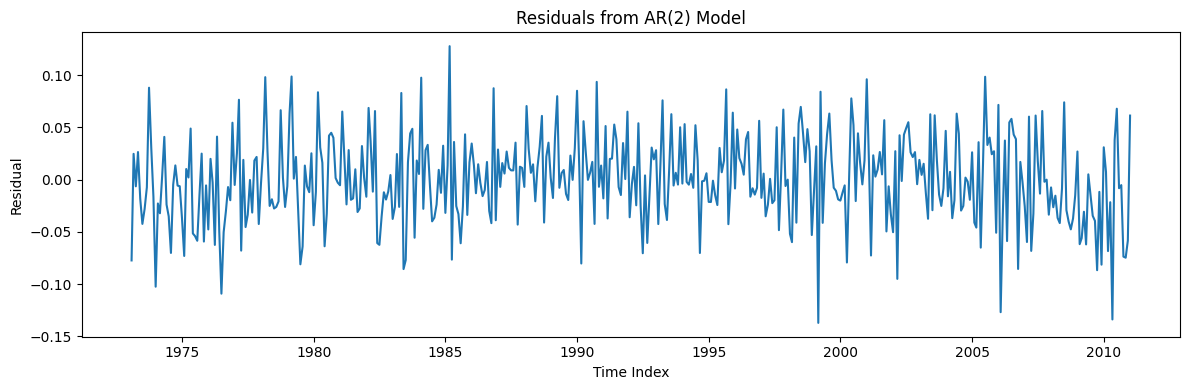

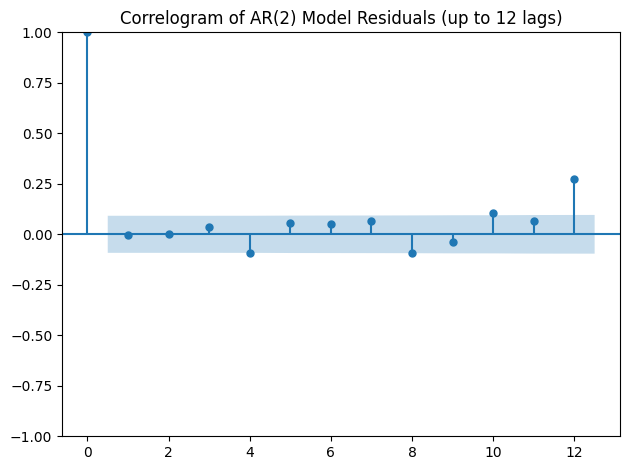

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

model_ar2 = ARIMA(resid, order=(2, 0, 0)).fit()

resid_ar2 = model_ar2.resid

plt.figure(figsize=(12, 4))
plt.plot(resid_ar2)
plt.title('Residuals from AR(2) Model')
plt.xlabel('Time Index')
plt.ylabel('Residual')
plt.tight_layout()
plt.show()

plot_acf(resid_ar2, lags=12)
plt.title('Correlogram of AR(2) Model Residuals (up to 12 lags)')
plt.tight_layout()
plt.show()


There is no evidence of cycles in the residuals.

Step 9: Use  the  model  you  chose  in  Step 7,  forecast  the level  of  electricity  retail  sales  for year 2011 and compute its 95% interval forecasts as well. Plot your point and interval forecasts together with actual data for the period from 2008 to 2011.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


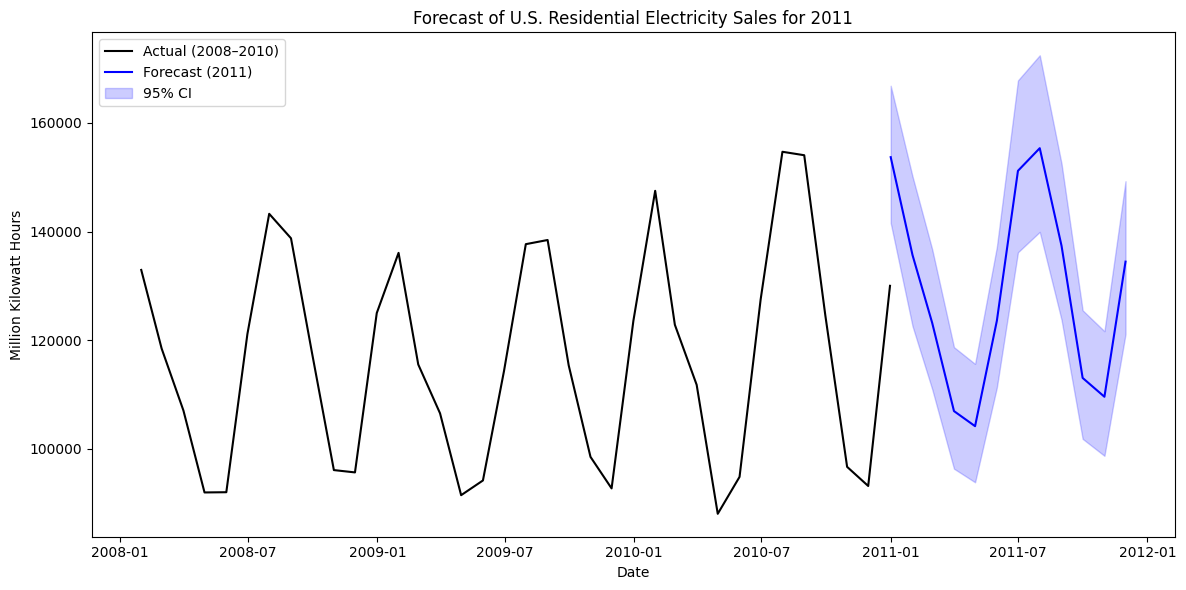

In [30]:
model_ar2 = ARIMA(resid, order=(2, 0, 0)).fit()

forecast_resid = model_ar2.get_forecast(steps=12)
resid_mean = forecast_resid.predicted_mean
resid_ci = forecast_resid.conf_int(alpha=0.05)

future_index = pd.date_range(start='2011-01-01', end='2011-12-01', freq='MS')
future_trend = np.arange(len(elec), len(elec) + 12)

future_months = future_index.month
month_dummies = pd.get_dummies(future_months, prefix='month')

missing_cols = [col for col in X.columns[2:] if col not in month_dummies.columns]
for col in missing_cols:
    month_dummies[col] = 0
month_dummies = month_dummies[X.columns[2:]]

X_future = pd.DataFrame({
    'const': 1,
    'trend': future_trend
})
X_future = pd.concat([X_future, month_dummies], axis=1)
X_future = X_future.astype(float)

deterministic_part = model_seasonal.predict(X_future).values.flatten()[:12]

resid_mean = resid_mean.values.flatten()[:12]
resid_ci_lower = resid_ci.iloc[:12, 0].values
resid_ci_upper = resid_ci.iloc[:12, 1].values

log_forecast = deterministic_part + resid_mean
log_forecast_lower = deterministic_part + resid_ci_lower
log_forecast_upper = deterministic_part + resid_ci_upper

forecast = np.exp(log_forecast)
forecast_lower = np.exp(log_forecast_lower)
forecast_upper = np.exp(log_forecast_upper)

plt.figure(figsize=(12, 6))

elec_actual = elec['elec']['2008-01-01':'2011-01-01']
plt.plot(elec_actual.index, elec_actual, label='Actual (2008–2010)', color='black')

plt.plot(future_index, forecast, label='Forecast (2011)', color='blue')
plt.fill_between(future_index, forecast_lower, forecast_upper, color='blue', alpha=0.2, label='95% CI')

plt.title('Forecast of U.S. Residential Electricity Sales for 2011')
plt.xlabel('Date')
plt.ylabel('Million Kilowatt Hours')
plt.legend()
plt.tight_layout()
plt.show()


#Question 2: model and forecat industrial production data
Step 1: import data from Github

- Check to see that DataFrame ```industrial``` has two columns ```date``` and ```lip```
- The variable ```lip``` is the log of the seasonally adjusted industrial production index of the US ($ip=100$ in 2007).
- The sample is monthly and covers the period from 1980M1 to 2014M12 but use the sample up to 2013M12 (do not include observations in 2014).

In [33]:
industrial = pd.read_csv('https://raw.githubusercontent.com/shihanxie/Econ475/main/data/industrial.csv')

industrial.index = pd.date_range(start='1980-01-01', periods=industrial.shape[0], freq='M')

start = '1980-01-01'
end = '2014-01-01'

industrial = industrial[start:end]

print(industrial.head())
print(industrial.tail())


               date       lip
1980-01-31  1980-01  3.947828
1980-02-29  1980-02  3.948399
1980-03-31  1980-03  3.945204
1980-04-30  1980-04  3.924767
1980-05-31  1980-05  3.900220
               date       lip
2013-08-31  2013-08  4.605157
2013-09-30  2013-09  4.612322
2013-10-31  2013-10  4.613327
2013-11-30  2013-11  4.618827
2013-12-31  2013-12  4.620622


<ipython-input-33-68dd917193bd>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  industrial.index = pd.date_range(start='1980-01-01', periods=industrial.shape[0], freq='M')


Step 2: Estimate a model with the intercept and a linear time trend and report the estimation result

In [34]:
import statsmodels.api as sm

industrial['trend'] = np.arange(len(industrial))

y = industrial['lip']
X = sm.add_constant(industrial['trend'])

model_linear = sm.OLS(y, X).fit()

print(model_linear.summary())


                            OLS Regression Results                            
Dep. Variable:                    lip   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     4435.
Date:                Mon, 05 May 2025   Prob (F-statistic):          1.27e-220
Time:                        22:49:12   Log-Likelihood:                 503.70
No. Observations:                 408   AIC:                            -1003.
Df Residuals:                     406   BIC:                            -995.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8964      0.007    558.584      0.0

Step 3: Compute the correlogram of the residuals in Step 2 up to 12 lags and describe any interesting characteristics. Would an AR model or an MA model fit the data better?

<Figure size 1000x400 with 0 Axes>

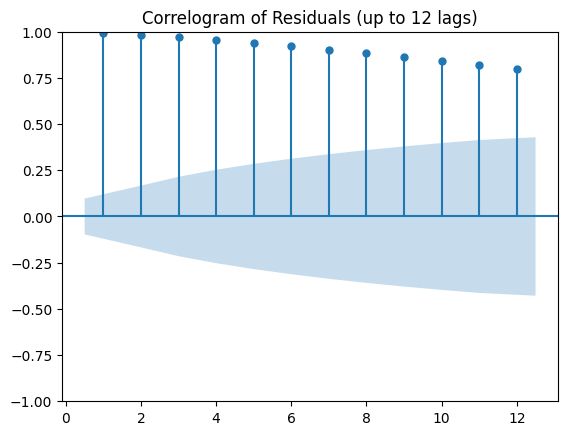

In [35]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

residuals = model_linear.resid

plt.figure(figsize=(10, 4))
plot_acf(residuals, lags=12, zero=False)
plt.title('Correlogram of Residuals (up to 12 lags)')
plt.show()


An AR model will be more suitable due to the gradual decay of the ACF

Step 4: Estimate an AR model, including the intercept and a linear time trend, with 1, 2, ..., 6 lags and report SICs of all these models.

In [41]:
import statsmodels.api as sm

industrial = pd.read_csv('https://raw.githubusercontent.com/shihanxie/Econ475/main/data/industrial.csv')
industrial.index = pd.date_range(start='1980-01-01', periods=industrial.shape[0], freq='M')
industrial = industrial.loc[:'2013-12-01']

y = industrial['lip']
trend = np.arange(len(y))

X_base = pd.DataFrame({
    'const': 1,
    'trend': trend
}, index=industrial.index)

sic_values = []
models = []

for lag in range(1, 7):
    X_lags = pd.concat([y.shift(i) for i in range(1, lag + 1)], axis=1)
    X_lags.columns = [f'lag_{i}' for i in range(1, lag + 1)]

    X_all = pd.concat([X_base, X_lags], axis=1).dropna()
    y_aligned = y.loc[X_all.index]

    model = sm.OLS(y_aligned, X_all).fit()
    models.append(model)
    sic_values.append(model.bic)

    print(f"AR({lag}) Model – SIC: {model.bic:.2f}")

best_lag = np.argmin(sic_values) + 1
best_model = models[best_lag - 1]
print(f"\nBest model is AR({best_lag}) with SIC = {sic_values[best_lag - 1]:.2f}")


AR(1) Model – SIC: -2872.55
AR(2) Model – SIC: -2892.70
AR(3) Model – SIC: -2907.55
AR(4) Model – SIC: -2917.45
AR(5) Model – SIC: -2919.60
AR(6) Model – SIC: -2907.08

Best model is AR(5) with SIC = -2919.60


<ipython-input-41-731eb0d2c0c1>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  industrial.index = pd.date_range(start='1980-01-01', periods=industrial.shape[0], freq='M')


Step 5: Choose the lag length for an AR model based on SIC and report the estimation result of the AR model with the chosen lag length.  Check out the ```Durbin-Watson``` statistic.  What doesthe DW statistic suggest?

In [42]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(best_model.resid)

print(f"Durbin–Watson statistic for AR({best_lag}) model: {dw_stat:.4f}")

if dw_stat < 1.5:
    interpretation = "Evidence of positive autocorrelation."
elif dw_stat > 2.5:
    interpretation = "Evidence of negative autocorrelation."
else:
    interpretation = "Little to no evidence of autocorrelation."

print(f"Interpretation: {interpretation}")


Durbin–Watson statistic for AR(5) model: 2.0075
Interpretation: Little to no evidence of autocorrelation.


There is essentially no evidence of autocorrelation.

Step 6: Now use the model chosen in Step 5. Consider the correlogram of the residuals up to 12 lags. Is there any evidence of serial correlation in the residuals?

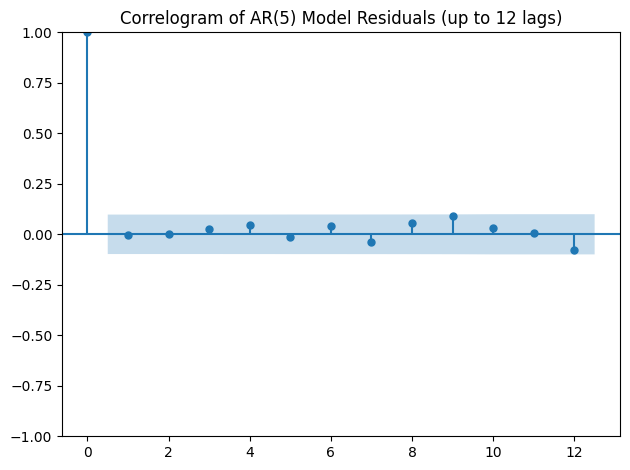

In [43]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

residuals = best_model.resid

plot_acf(residuals, lags=12, title='Correlogram of AR(5) Model Residuals (up to 12 lags)')
plt.tight_layout()
plt.show()


There is no evidence of serial correlation.

Step 7: Use the model chosen in Step 5. Do the ```Breusch-Godfrey``` test (serial correlation LM test) on the residuals with 6 lags included.  Do you reject the null hypothesis at the 5% significance level?

In [45]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

bg_test = acorr_breusch_godfrey(best_model, nlags=6)

lm_stat, lm_pvalue, f_stat, f_pvalue = bg_test

print(f"LM Statistic: {lm_stat}")
print(f"LM p-value: {lm_pvalue}")
print(f"F Statistic: {f_stat}")
print(f"F p-value: {f_pvalue}")


LM Statistic: 7.949984530116911
LM p-value: 0.24179052285209132
F Statistic: 1.308016690269991
F p-value: 0.2523720807296942


Since both p-values are greater than 0.05, you fail to reject the null hypothesis of no serial correlation at the 5% significance level.

Step 8: The Great Recession made industrial production drop substantially in 2008 and 2009. Do you think the model chosen in Step 5 became invalid to describe the dynamics ofthe industrial production after the Great Recession?  Try to provide some evidence for your conclusion using appropriate statistics.

Although the AR(5) model fit the pre-2008 data well, the forecast plot shows clear underprediction after the 2008–2009 Great Recession. This indicates the model became invalid for describing post-recession dynamics. The structural break caused by the recession likely changed the data-generating process, which the model—based on pre-recession patterns—could not capture.

Step 9: Forecast the **level** of the industrial production for year 2014 and compute its 95% interval forecasts as well. Plot your point and interval forecasts together with actual data forthe period from 2010 to 2014.



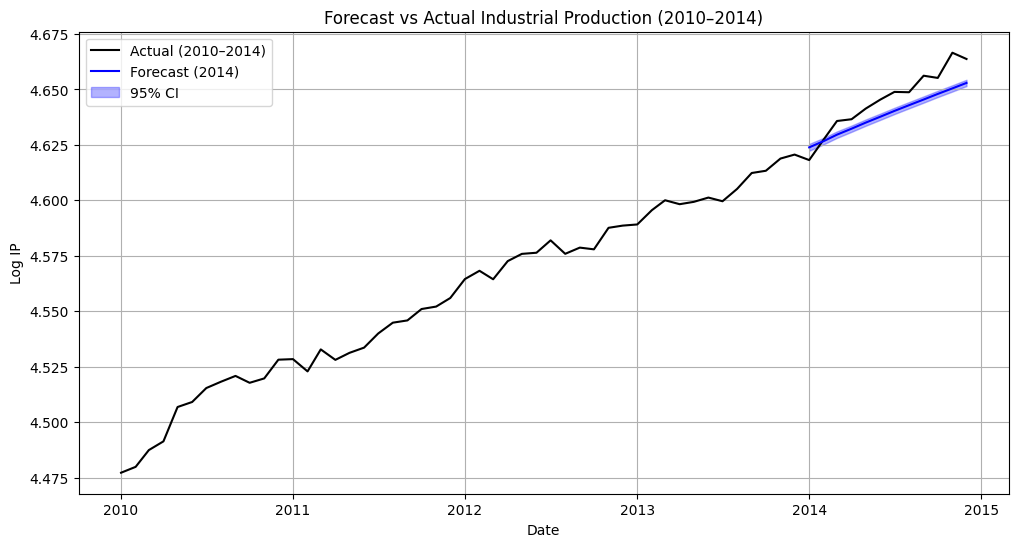

In [47]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

industrial = pd.read_csv('https://raw.githubusercontent.com/shihanxie/Econ475/main/data/industrial.csv')
industrial.index = pd.date_range(start='1980-01-01', periods=industrial.shape[0], freq='MS')

train_end = '2013-12-01'
y = industrial['lip'][:train_end]

X_trend = pd.DataFrame({'trend': np.arange(1, len(y) + 1)}, index=y.index)
X_lags = pd.concat([y.shift(i) for i in range(1, 6)], axis=1)
X_lags.columns = [f'lag{i}' for i in range(1, 6)]
X_all = pd.concat([sm.add_constant(X_trend), X_lags], axis=1).dropna()
y_aligned = y[X_all.index]

model = sm.OLS(y_aligned, X_all).fit()

forecast_steps = 12
forecast_index = pd.date_range(start='2014-01-01', periods=forecast_steps, freq='MS')
last_obs = y.copy()

forecast_values = []
conf_ints = []

for step in range(forecast_steps):
    current_index = forecast_index[step]
    trend_val = len(last_obs) + 1
    lags = [last_obs.iloc[-i] for i in range(1, 6)]
    x_pred = [1, trend_val] + lags
    pred = model.get_prediction([x_pred])
    mean = pred.predicted_mean[0]
    ci = pred.conf_int(alpha=0.05)[0]

    forecast_values.append(mean)
    conf_ints.append(ci)
    last_obs = pd.concat([last_obs, pd.Series(mean, index=[current_index])])

forecast_series = pd.Series(forecast_values, index=forecast_index)
conf_ints = np.array(conf_ints)
lower_bound = pd.Series(conf_ints[:, 0], index=forecast_index)
upper_bound = pd.Series(conf_ints[:, 1], index=forecast_index)

plt.figure(figsize=(12, 6))
actual_plot_range = industrial['lip']['2010-01-01':'2014-12-01']
plt.plot(actual_plot_range.index, actual_plot_range, label='Actual (2010–2014)', color='black')
plt.plot(forecast_series.index, forecast_series, label='Forecast (2014)', color='blue')
plt.fill_between(forecast_series.index, lower_bound, upper_bound, color='blue', alpha=0.3, label='95% CI')
plt.title('Forecast vs Actual Industrial Production (2010–2014)')
plt.xlabel('Date')
plt.ylabel('Log IP')
plt.legend()
plt.grid(True)
plt.show()


## Question 3: Modeling volatility using US Dollar / Australian Dollar exchange rate data
Step 1: import data from Github
- Check to see that DataFrame usdaud a column ```USDAUD```, which is the USD/AUD exchange rate
- The sample is daily and covers the period from Jan 2, 2001 to Oct 14, 2004

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats

!pip install arch
from arch import arch_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 11.6 MB/s eta 0:00:00


In [49]:
usdaud = pd.read_csv('https://raw.githubusercontent.com/shihanxie/Econ475/main/data/usdaud.csv')
usdaud.index = pd.date_range(start='2001-01-02', periods= usdaud.shape[0], freq='D')

Step 2: Compute and plot the first difference of the log(exchange rate), or $\Delta \log(usdaud_t) \times 100$. From now on, we will use $y_t$ to refer $\Delta \log(usdaud_t) \times 100$, which is the daily percentage change in USD/AUD exchange rate.

Hint: use ```np.log(var).diff()``` to compute the first difference of the log of ```var```.

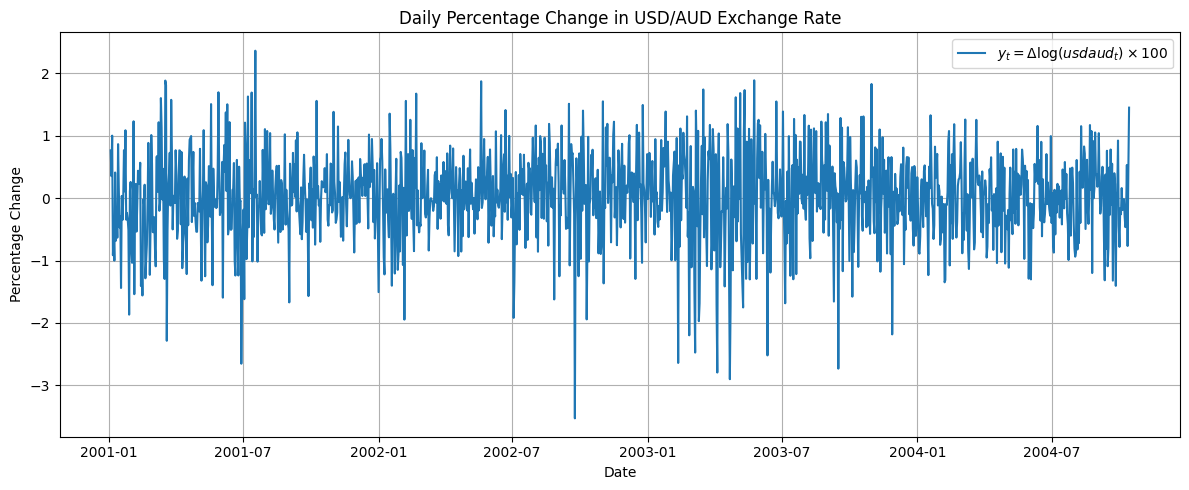

In [50]:
usdaud['y'] = 100 * np.log(usdaud['USDAUD']).diff()

usdaud = usdaud.dropna()

plt.figure(figsize=(12, 5))
plt.plot(usdaud.index, usdaud['y'], label=r'$y_t = \Delta \log(usdaud_t) \times 100$')
plt.title('Daily Percentage Change in USD/AUD Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Step 3: Plot the histogram and compute the descriptive statistics of $y_t$. Conduct the proper test to see if it is normally distributed.

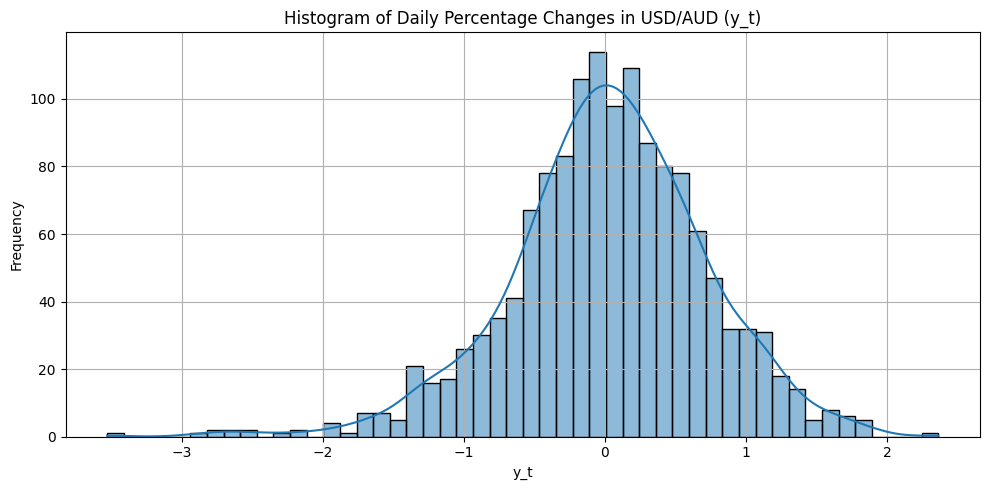

Descriptive Statistics:
count    1381.000000
mean        0.020510
std         0.699923
min        -3.529074
25%        -0.377257
50%         0.036623
75%         0.463301
max         2.364642
Name: y, dtype: float64

Skewness: -0.4365
Kurtosis: 1.3804

Jarque-Bera Test Statistic: 151.9318
p-value: 0.0000
Conclusion: Reject the null hypothesis. y_t is not normally distributed.


In [51]:
import seaborn as sns
from scipy.stats import jarque_bera

plt.figure(figsize=(10, 5))
sns.histplot(usdaud['y'], bins=50, kde=True)
plt.title('Histogram of Daily Percentage Changes in USD/AUD (y_t)')
plt.xlabel('y_t')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

desc_stats = usdaud['y'].describe()
skewness = usdaud['y'].skew()
kurtosis = usdaud['y'].kurtosis()
print("Descriptive Statistics:")
print(desc_stats)
print(f"\nSkewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

jb_stat, jb_pvalue = jarque_bera(usdaud['y'])
print(f"\nJarque-Bera Test Statistic: {jb_stat:.4f}")
print(f"p-value: {jb_pvalue:.4f}")

if jb_pvalue < 0.05:
    print("Conclusion: Reject the null hypothesis. y_t is not normally distributed.")
else:
    print("Conclusion: Do not reject the null hypothesis. y_t may be normally distributed.")


Step 4: Compare the historgram of $y_t$ to a normal distribution.

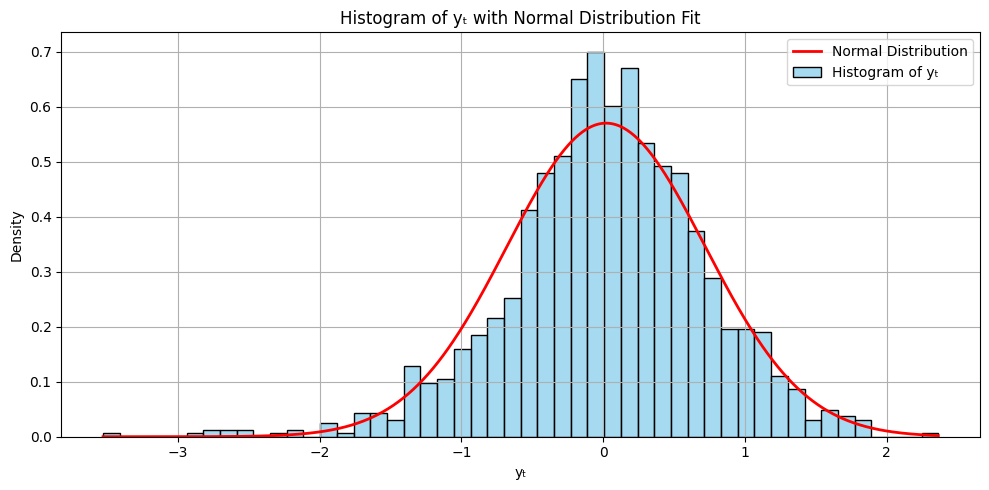

In [52]:
import scipy.stats as stats

plt.figure(figsize=(10, 5))
sns.histplot(usdaud['y'], bins=50, kde=False, stat='density', color='skyblue', label='Histogram of yₜ')

mu, std = stats.norm.fit(usdaud['y'])

x = np.linspace(usdaud['y'].min(), usdaud['y'].max(), 1000)
pdf = stats.norm.pdf(x, mu, std)
plt.plot(x, pdf, 'r', linewidth=2, label='Normal Distribution')

plt.title('Histogram of yₜ with Normal Distribution Fit')
plt.xlabel('yₜ')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Step 5: Compute the correlogram of squared $y_t$ up to 12 lags.

<Figure size 800x400 with 0 Axes>

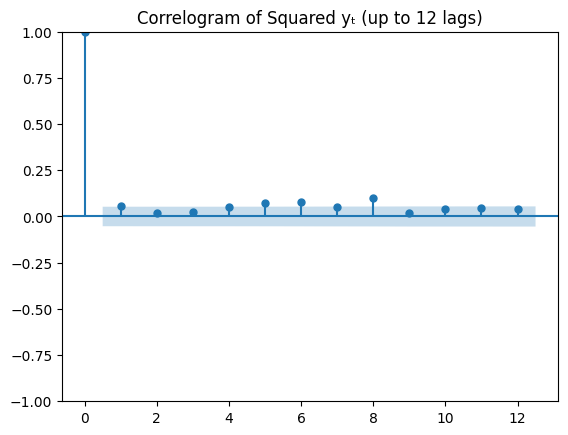

In [53]:
from statsmodels.graphics.tsaplots import plot_acf

y_squared = usdaud['y'] ** 2

plt.figure(figsize=(8, 4))
plot_acf(y_squared.dropna(), lags=12, title='Correlogram of Squared yₜ (up to 12 lags)')
plt.show()


Step 6: Estimate an AR(1) model for squared $y_t$

In [54]:
import statsmodels.api as sm

y_squared = usdaud['y'] ** 2
y_squared = y_squared.dropna()

y_squared_lag1 = y_squared.shift(1)

X = sm.add_constant(y_squared_lag1.dropna())
y = y_squared.loc[X.index]

model_ar1 = sm.OLS(y, X).fit()

print(model_ar1.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.835
Date:                Mon, 05 May 2025   Prob (F-statistic):             0.0280
Time:                        23:17:54   Log-Likelihood:                -1799.2
No. Observations:                1380   AIC:                             3602.
Df Residuals:                    1378   BIC:                             3613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4610      0.027     16.837      0.0

Step 7: Estimate an ARCH(1) model and a GARCH(1,1) model for
$$
\begin{aligned}
&y_t =\mu+\varepsilon_{t} \\
&\varepsilon_{t} \mid \Omega_{t-1} \sim N\left(0, \sigma_{t}^{2}\right)
\end{aligned}
$$

In [55]:
from arch import arch_model

y = usdaud['y'].dropna()

arch1_model = arch_model(y, vol='ARCH', p=1, mean='Constant', dist='normal')
arch1_result = arch1_model.fit(disp='off')
print("ARCH(1) Model Summary:")
print(arch1_result.summary())

garch11_model = arch_model(y, vol='GARCH', p=1, q=1, mean='Constant', dist='normal')
garch11_result = garch11_model.fit(disp='off')
print("\nGARCH(1,1) Model Summary:")
print(garch11_result.summary())


ARCH(1) Model Summary:
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1462.82
Distribution:                  Normal   AIC:                           2931.63
Method:            Maximum Likelihood   BIC:                           2947.33
                                        No. Observations:                 1381
Date:                Mon, May 05 2025   Df Residuals:                     1380
Time:                        23:18:26   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0290  1.924e-02

Step 8: Estimate an AR(1)-ARCH(1) model and an AR(1)-GARCH(1,1) model for
$$
\begin{aligned}
&y_t =\mu+\rho y_{t-1} + \varepsilon_{t} \\
&\varepsilon_{t} \mid \Omega_{t-1} \sim N\left(0, \sigma_{t}^{2}\right)
\end{aligned}
$$

In [56]:
from arch import arch_model

y = usdaud['y'].dropna()

ar1_arch1_model = arch_model(y, mean='AR', lags=1, vol='ARCH', p=1, dist='normal')
ar1_arch1_result = ar1_arch1_model.fit(disp='off')
print("AR(1)-ARCH(1) Model Summary:")
print(ar1_arch1_result.summary())

ar1_garch11_model = arch_model(y, mean='AR', lags=1, vol='GARCH', p=1, q=1, dist='normal')
ar1_garch11_result = ar1_garch11_model.fit(disp='off')
print("\nAR(1)-GARCH(1,1) Model Summary:")
print(ar1_garch11_result.summary())


AR(1)-ARCH(1) Model Summary:
                           AR - ARCH Model Results                            
Dep. Variable:                      y   R-squared:                       0.001
Mean Model:                        AR   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:               -1461.26
Distribution:                  Normal   AIC:                           2930.51
Method:            Maximum Likelihood   BIC:                           2951.43
                                        No. Observations:                 1380
Date:                Mon, May 05 2025   Df Residuals:                     1378
Time:                        23:19:06   Df Model:                            2
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const          0.0275  1.9

Step 9: Plot the estimated conditional variance of the best-fitting model among the ones considered

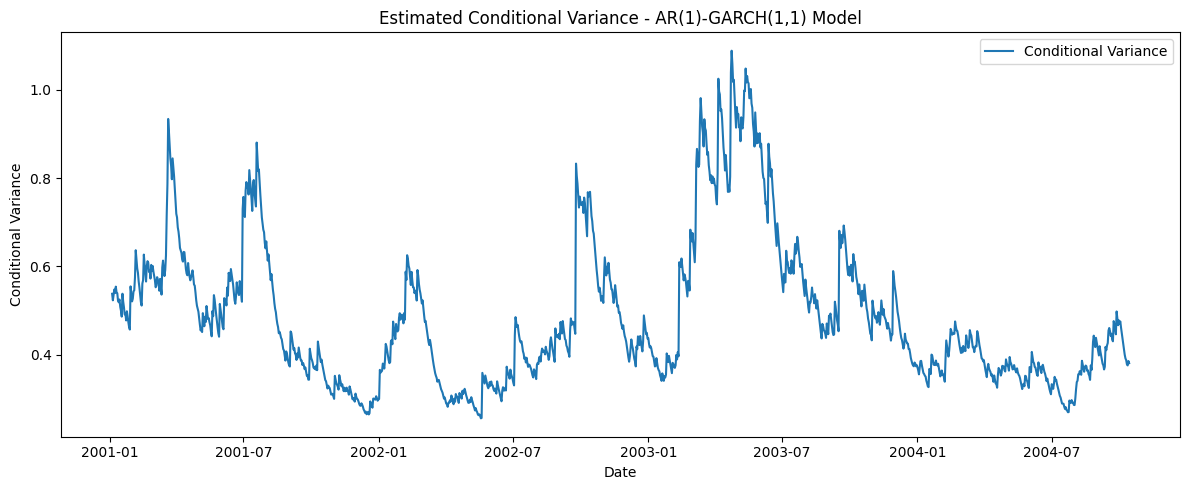

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(ar1_garch11_result.conditional_volatility ** 2, label='Conditional Variance')
plt.title('Estimated Conditional Variance - AR(1)-GARCH(1,1) Model')
plt.xlabel('Date')
plt.ylabel('Conditional Variance')
plt.legend()
plt.tight_layout()
plt.show()
